Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
searching from: [0, 0] to [2, 0]
Frontier: [[0, 0]]

Now in: [0, 0]
The neighbors of state [0, 0] are   : [[4, 0], [0, 3]]
Frontier: [[4, 0], [0, 3]]

Now in: [4, 0]
The neighbors of state [4, 0] are   : [[4, 3], [0, 0], [1, 3]]
Frontier: [[0, 3], [4, 3], [1, 3]]

Now in: [0, 3]
The neighbors of state [0, 3] are   : [[4, 3], [0, 0], [3, 0]]
Frontier: [[4, 3], [1, 3], [3, 0]]

Now in: [4, 3]
The neighbors of state [4, 3] are   : [[0, 3], [4, 0]]
Frontier: [[1, 3], [3, 0]]

Now in: [1, 3]
The neighbors of state [1, 3] are   : [[4, 3], [0, 3], [1, 0], [4, 0], [4, 0]]
Frontier: [[3, 0], [1, 0]]

Now in: [3, 0]
The neighbors of state [3, 0] are   : [[4, 0], [3, 3], [0, 0], [0, 3], [0, 3]]
Frontier: [[1, 0], [3, 3]]

Now in: [1, 0]
The neighbors of state [1, 0] are   : [[4, 0

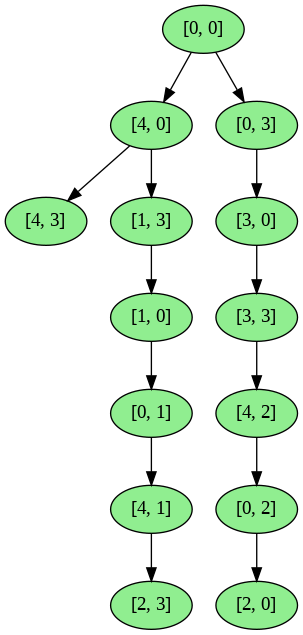

In [1]:
# =========================================
# Water Jug Problem (4-gallon & 3-gallon)
# DFS Search with State Space Graph
# =========================================

# -------- Step 1: Define Actions ----------
al = [None,
      'fillA',        # Fill 4-gallon jug
      'fillB',        # Fill 3-gallon jug
      'emptyA',       # Empty 4-gallon jug
      'emptyB',       # Empty 3-gallon jug
      'fillAfromB',   # Pour from B to A until A is full
      'fillBfromA',   # Pour from A to B until B is full
      'emptyBintoA',  # Pour all from B into A
      'emptyAintoB'   # Pour all from A into B
     ]


# -------- Step 2: Branching Factor ----------
def branching_factor(s):
    actions = []
    X, Y = s

    if X < 4:
        actions.append(al[1])
    if Y < 3:
        actions.append(al[2])
    if X > 0:
        actions.append(al[3])
    if Y > 0:
        actions.append(al[4])
    if Y > 0 and X < 4 and (X + Y) >= 4:
        actions.append(al[5])
    if X > 0 and Y < 3 and (X + Y) >= 3:
        actions.append(al[6])
    if Y > 0 and (X + Y) <= 4:
        actions.append(al[7])
    if X > 0 and (X + Y) <= 3:
        actions.append(al[8])

    return actions


# -------- Step 3: Result Function ----------
def result(state, action):
    X, Y = state

    if action == 'fillA':
        X = 4
    elif action == 'fillB':
        Y = 3
    elif action == 'emptyA':
        X = 0
    elif action == 'emptyB':
        Y = 0
    elif action == 'fillAfromB':
        transfer = min(Y, 4 - X)
        X += transfer
        Y -= transfer
    elif action == 'fillBfromA':
        transfer = min(X, 3 - Y)
        Y += transfer
        X -= transfer
    elif action == 'emptyBintoA':
        X += Y
        Y = 0
    elif action == 'emptyAintoB':
        Y += X
        X = 0

    return [X, Y]


# -------- Step 4: Neighbors Function ----------
def neighbors(s):
    actionlist = branching_factor(s)
    successors = [result(s, a) for a in actionlist]
    print('The neighbors of state', s, 'are   :', successors)
    return successors


# -------- Step 5: Goal Test ----------
def goal_test(goal, state):
    return state == goal


# -------- Step 6: Install Graph Libraries (Colab) ----------
!apt-get install graphviz -y
!pip install pydot


# -------- Step 7: Graph Drawing ----------
import pydot
from IPython.display import Image, display

G = pydot.Dot(graph_type="digraph")

def drawtree(parent, child):
    node = pydot.Node(str(child), style="filled", fillcolor="lightgreen")
    G.add_node(node)
    if parent != '':
        edge = pydot.Edge(str(parent), str(child))
        G.add_edge(edge)


# -------- Step 8: DFS Algorithm ----------
def dfs(start, goal):
    drawtree('', start)
    explored = []
    frontier = [start]

    print(f"searching from: {start} to {goal}")

    while frontier:
        print("Frontier:", frontier)
        state = frontier.pop(0)
        explored.append(state)

        print("\nNow in:", state)

        if goal_test(goal, state):
            print("Destination reached")
            return state

        for neighbor in neighbors(state):
            if neighbor not in explored and neighbor not in frontier:
                frontier.append(neighbor)
                drawtree(state, neighbor)

    print("failure")
    return None


# -------- Step 9: Run Program ----------
initial = [0, 0]
goal = [2, 0]

dfs(initial, goal)


# -------- Step 10: Display State Space Graph ----------
display(Image(G.create_png()))
